<a href="https://colab.research.google.com/github/shu-nya/Image-Classification-of-White-Blood-Cells/blob/master/WBC_Aumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Lambda
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import csv
import cv2
import os

In [4]:
# BASE_PATH = '/content/drive/MyDrive/taskMedPrime'

In [9]:
BASE_DIR = '/content/drive/MyDrive/taskMedPrime'

In [10]:
def get_data(folder):
    X = []
    y = []

    for wbc_type in os.listdir(folder):
        if not wbc_type.startswith('.'):

            for image_filename in os.listdir(folder + '/' + wbc_type):
                img_file = cv2.imread(folder + '/' + wbc_type + '/' + image_filename)

                if img_file is not None:
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(wbc_type)

    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [11]:
X_train, y_train = get_data(BASE_DIR + '/train')
X_test, y_test = get_data(BASE_DIR + '/test')


X_train = X_train * 1./255.
X_test = X_test * 1./255.


In [15]:
print(X_train)

[[[[0.90588235 0.89019608 0.93333333]
   [0.89411765 0.88235294 0.91764706]
   [0.89803922 0.88627451 0.92156863]
   ...
   [0.9372549  0.92941176 0.95294118]
   [0.94509804 0.92941176 0.95294118]
   [0.94509804 0.92941176 0.95294118]]

  [[0.90588235 0.89019608 0.93333333]
   [0.90196078 0.89019608 0.9254902 ]
   [0.90588235 0.89803922 0.92156863]
   ...
   [0.9372549  0.92941176 0.95294118]
   [0.94901961 0.93333333 0.95686275]
   [0.95294118 0.9372549  0.96078431]]

  [[0.90980392 0.89803922 0.93333333]
   [0.91372549 0.90196078 0.9372549 ]
   [0.90980392 0.90196078 0.9254902 ]
   ...
   [0.94901961 0.93333333 0.95686275]
   [0.95294118 0.9372549  0.96078431]
   [0.95686275 0.94117647 0.96470588]]

  ...

  [[0.9254902  0.90980392 0.93333333]
   [0.92941176 0.91372549 0.9372549 ]
   [0.93333333 0.91372549 0.94901961]
   ...
   [0.91764706 0.6745098  0.85490196]
   [0.91764706 0.67843137 0.85098039]
   [0.9254902  0.69019608 0.85098039]]

  [[0.9254902  0.90980392 0.93333333]
   [0.9

In [16]:
print(y_train)

['bands' 'bands' 'bands' 'bands' 'bands' 'bands' 'bands' 'bands' 'bands'
 'bands' 'bands' 'bands' 'bands' 'bands' 'bands' 'bands' 'bands' 'bands'
 'bands' 'bands' 'bands' 'basophils' 'basophils' 'basophils' 'basophils'
 'basophils' 'basophils' 'blasts' 'blasts' 'blasts' 'eosinophils'
 'eosinophils' 'eosinophils' 'eosinophils' 'eosinophils' 'eosinophils'
 'eosinophils' 'eosinophils' 'eosinophils' 'eosinophils' 'eosinophils'
 'eosinophils' 'eosinophils' 'eosinophils' 'eosinophils' 'eosinophils'
 'eosinophils' 'eosinophils' 'eosinophils' 'eosinophils' 'lymphocytes'
 'lymphocytes' 'lymphocytes' 'lymphocytes' 'lymphocytes' 'lymphocytes'
 'lymphocytes' 'lymphocytes' 'lymphocytes' 'lymphocytes' 'lymphocytes'
 'lymphocytes' 'lymphocytes' 'lymphocytes' 'lymphocytes' 'lymphocytes'
 'lymphocytes' 'lymphocytes' 'lymphocytes' 'lymphocytes' 'lymphocytes'
 'lymphocytes' 'lymphocytes' 'lymphocytes' 'lymphocytes' 'lymphocytes'
 'lymphocytes' 'lymphocytes' 'lymphocytes' 'lymphocytes' 'lymphocytes'
 'lym

In [17]:
print(X_test)

[[[[0.90588235 0.87058824 0.90980392]
   [0.90588235 0.8745098  0.91372549]
   [0.90980392 0.87843137 0.91764706]
   ...
   [0.90588235 0.89019608 0.90980392]
   [0.89019608 0.88627451 0.90196078]
   [0.87843137 0.88627451 0.89019608]]

  [[0.89803922 0.8627451  0.90196078]
   [0.90196078 0.86666667 0.90588235]
   [0.90196078 0.87058824 0.90980392]
   ...
   [0.89411765 0.87843137 0.90196078]
   [0.88627451 0.88235294 0.89803922]
   [0.88627451 0.88235294 0.89803922]]

  [[0.90588235 0.8627451  0.89411765]
   [0.89803922 0.86666667 0.89411765]
   [0.90196078 0.87058824 0.89803922]
   ...
   [0.8745098  0.8745098  0.89803922]
   [0.89411765 0.87843137 0.90196078]
   [0.90588235 0.87843137 0.90588235]]

  ...

  [[0.88235294 0.83137255 0.89411765]
   [0.88235294 0.83137255 0.89411765]
   [0.87843137 0.82745098 0.89019608]
   ...
   [0.90196078 0.88627451 0.90588235]
   [0.91372549 0.89019608 0.90980392]
   [0.91372549 0.89019608 0.90980392]]

  [[0.88627451 0.82352941 0.89411765]
   [0.8

In [18]:
print(y_test)

['bands' 'bands' 'bands' 'bands' 'bands' 'bands' 'basophils' 'basophils'
 'blasts' 'eosinophils' 'eosinophils' 'eosinophils' 'eosinophils'
 'eosinophils' 'lymphocytes' 'lymphocytes' 'lymphocytes' 'lymphocytes'
 'lymphocytes' 'lymphocytes' 'lymphocytes' 'lymphocytes' 'lymphocytes'
 'lymphocytes' 'lymphocytes' 'lymphocytes' 'lymphocytes' 'lymphocytes'
 'lymphocytes' 'lymphocytes' 'lymphocytes' 'lymphocytes' 'lymphocytes'
 'lymphocytes' 'lymphocytes' 'lymphocytes' 'lymphocytes' 'lymphocytes'
 'lymphocytes' 'lymphocytes' 'lymphocytes' 'lymphocytes' 'lymphocytes'
 'lymphocytes' 'lymphocytes' 'lymphocytes' 'lymphocytes' 'lymphocytes'
 'lymphocytes' 'lymphocytes' 'lymphocytes' 'lymphocytes' 'metamyelocytes'
 'metamyelocytes' 'metamyelocytes' 'metamyelocytes' 'metamyelocytes'
 'monocytes' 'monocytes' 'monocytes' 'monocytes' 'monocytes' 'monocytes'
 'myelocytes' 'myelocytes' 'neutrophils' 'neutrophils' 'neutrophils'
 'neutrophils' 'neutrophils' 'neutrophils' 'neutrophils' 'neutrophils'
 'neutro

In [3]:
'''
def get_filename_for_index(index):
    PREFIX = 'Original_Images/BloodImage_'
    num_zeros = 5 - len(index)
    path = '0' * num_zeros + index
    return PREFIX + path + '.jpg'

In [ ]:
'''
reader = csv.reader(open(BASE_PATH + 'labels.csv'))
# skip the header
next(reader)

X = []
y = []

for row in reader:
    label = row[2]
    if len(label) > 0 and label.find(',') == -1 and label is not 'BASOPHIL':
        filename = get_filename_for_index(row[1])
        img_file = cv2.imread(BASE_PATH + filename)
        if img_file is not None:
            img_file = cv2.cvtColor(img_file, cv2.COLOR_BGR2RGB)
            img_file = scipy.misc.imresize(arr=img_file, size=(240, 320, 3))
            img_arr = np.asarray(img_file)
            X.append(img_arr)
            y.append(label)
        else:
            print("No file found", BASE_PATH + filename)


X = np.asarray(X)
y = np.asarray(y)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [19]:
eosinophil_samples = X_train[np.where(y_train == 'eosinophils')]
lymphocyte_samples = X_train[np.where(y_train == 'lymphocytes')]
monocyte_samples = X_train[np.where(y_train == 'monocytes')]
neutrophil_samples = X_train[np.where(y_train == 'neutrophils')]

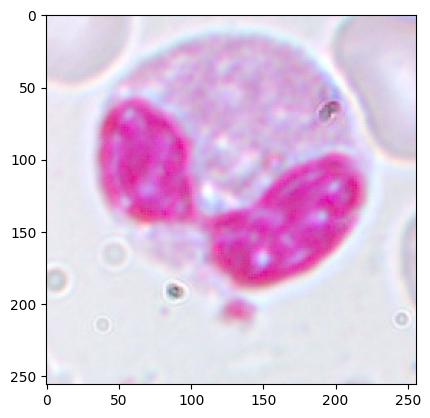

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

len(eosinophil_samples)
plt.imshow((eosinophil_samples[5])/(127.5 - 1))
plt.imshow((eosinophil_samples[5]))

In [22]:
datagen = ImageDataGenerator(
    rotation_range=20,
    fill_mode='constant',
    height_shift_range=0.1,
    width_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2
)

In [23]:
eosinophil_generator = datagen.flow(
        eosinophil_samples,
        y_train[np.where(y_train == 'eosinophils')],
        save_to_dir = BASE_DIR + '/train/eosinophils',
        batch_size=1)

lymphocyte_generator = datagen.flow(
        lymphocyte_samples,
        y_train[np.where(y_train == 'lymphocytes')],
        save_to_dir = BASE_DIR + '/train/lymphocytes',
        batch_size=1)

monocyte_generator = datagen.flow(
        monocyte_samples,
        y_train[np.where(y_train == 'monocytes')],
        save_to_dir = BASE_DIR + '/train/monocytes',
        batch_size=1)

neutrophil_generator = datagen.flow(
        neutrophil_samples,
        y_train[np.where(y_train == 'neutrophils')],
        save_to_dir = BASE_DIR + '/train/neutrophils',
        batch_size=1)

In [24]:
datagen_simple = ImageDataGenerator()

In [25]:
for i in range(2500):
    next(eosinophil_generator)
    next(lymphocyte_generator)
    next(monocyte_generator)
    next(neutrophil_generator)

In [26]:
eosinophil_test_samples = X_test[np.where(y_test == 'eosinophils')]
lymphocyte_test_samples = X_test[np.where(y_test == 'lymphocytes')]
monocyte_test_samples = X_test[np.where(y_test == 'monocytes')]
neutrophil_test_samples = X_test[np.where(y_test == 'neutrophils')]

In [27]:
eosinophil_test_generator = datagen_simple.flow(
        eosinophil_test_samples,
        y_test[np.where(y_test == 'eosinophils')],
        save_to_dir = BASE_DIR + '/test/eosinophils',
        batch_size=1)

lymphocyte_test_generator = datagen_simple.flow(
        lymphocyte_test_samples,
        y_test[np.where(y_test == 'lymphocytes')],
        save_to_dir = BASE_DIR + '/test/lymphocytes',
        batch_size=1)

monocyte_test_generator = datagen_simple.flow(
        monocyte_test_samples,
        y_test[np.where(y_test == 'monocytes')],
        save_to_dir = BASE_DIR + '/test/monocytes',
        batch_size=1)

neutrophil_test_generator = datagen_simple.flow(
        neutrophil_test_samples,
        y_test[np.where(y_test == 'neutrophils')],
        save_to_dir = BASE_DIR + '/test/neutrophils',
        batch_size=1)

In [28]:
for i in range(len(eosinophil_test_samples)):
    next(eosinophil_test_generator)
for i in range(len(lymphocyte_test_samples)):
    next(lymphocyte_test_generator)
for i in range(len(monocyte_test_samples)):
    next(monocyte_test_generator)
for i in range(len(neutrophil_test_samples)):
    next(neutrophil_test_generator)

In [ ]:
'''

datagen = ImageDataGenerator(
    rotation_range=20,
    fill_mode='constant',
    height_shift_range=0.1,
    width_shift_range=0.1)

eosinophil_test_generator = datagen.flow(
        eosinophil_test_samples[0:1],
        y_test[np.where(y_test == 'eusinophils')][0:1],
        save_to_dir='../image_augmentation_example',
        batch_size=1)

for i in range(5):
    next(eosinophil_test_generator)